In [3]:
import MDAnalysis as mda
import numpy as np
import matplotlib as mpl
import MDAnalysis.analysis.rms as rms
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def gates_proc(traj, top = "2jln_r10_g470_c22.psf"):
    u = mda.Universe(top, traj)
    traj_len = len(u.trajectory)

    gate1 = []
    gate2 = []
    gate3 = []

    for ts in u.trajectory:
        b_ec = u.select_atoms("resid 38:40") #select bundle for ec_thin comparison
        ec_thin = u.select_atoms("resid 351:353") #select extracellular thin gate
        b_ic = u.select_atoms("resid 152:154") #sic
        ic_thin = u.select_atoms("resid 220:222") #select intracellular thin gate
        b_tg = u.select_atoms("resid 29 or resid 32") #sic
        thick = u.select_atoms("resid 300 or resid 303:304") #select thick gate

        gate1_a = abs(b_ec.center_of_mass() - ec_thin.center_of_mass())
        gate2_a = abs(b_ic.center_of_mass() - ic_thin.center_of_mass())
        gate3_a = abs(b_tg.center_of_mass() - thick.center_of_mass())
        gate1_b = np.linalg.norm(gate1_a)
        gate2_b = np.linalg.norm(gate2_a)
        gate3_b = np.linalg.norm(gate3_a)

        gate1.append(gate1_b) #Ec_thin
        gate2.append(gate2_b) #Ic_thin
        gate3.append(gate3_b) #Thick Gate
        
    return gate1, gate2, gate3, traj_len

def gates_plot(gate1, gate2, gate3, traj_len, gatenames = ["Extracellular Thin", "Intracellular thin", "Thick Gate"], 
               colors = ["green blue", "blue", "sky blue"], save = False):
    
    time = np.linspace(0, traj_len, traj_len)
    sns.set_style("ticks")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.despine(fig, right=True, top=True)
    ax.plot(gate1, sns.xkcd_rgb[colors[0]], label = gatenames[0], zorder = 0)
    ax.plot(gate2, sns.xkcd_rgb[colors[1]], label = gatenames[1], zorder = 1)
    ax.plot(gate3, sns.xkcd_rgb[colors[2]], label = gatenames[2], zorder = 2)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
    ax.grid(False)
    ax.legend(loc='best') #bbox_to_anchor=(1, 0.5)
    ax.set_xlabel("time (ps)")
    ax.set_ylabel(r"RMSD-to-Bundle ($\AA$)")
    if save == True:
        fig.savefig("mhp1_gate_tseries_occ2if_mhp1.pdf")
    plt.show()

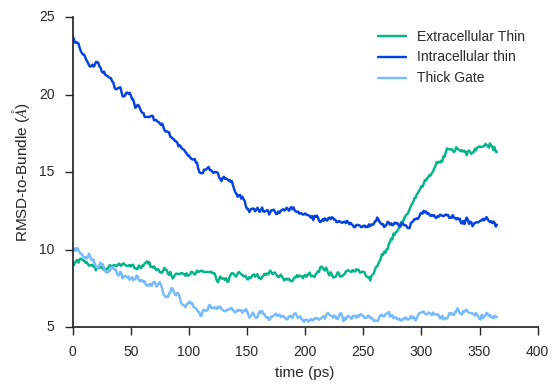

In [25]:
test = "../data/dims/oliver/implicit_no_memb/in2occ2out/TM3_TM8_fixed/001/dims_i_opn-o_occ-o_opn.dcd"
g1, g2, g3, traj_len = gates_proc(test)
gates_plot(g1, g2, g3, traj_len)